# Titanic: Kaggle Friendly Challenge for Beginners
### Analyse what sorts of people were likely to survive in the Titanic disaster of April 15, 1912. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
#### https://www.kaggle.com/c/titanic

In [29]:
import pandas as pd


In [30]:
# Read data and run descriptive statistics
trainpath = "C:\\Users\\Bish\\Documents\\Data Analytics\\Kaggle\\Titanic\\train.csv"
titanic_raw = pd.read_csv(trainpath)
titanic = titanic_raw
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [31]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [32]:
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [33]:
# To find how many null columns...

titanic_nullcols = titanic.columns[titanic.isnull().any()]
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### We have null values in Age, Cabin and Embarked for the raw training dataset so we may need to impute the values.

#### Normally we wouldnt need to worry about the Kaggle test.csv at this point but looking at the available columns in the training set, and reading the blogs and forks on Kaggle, it seems like we would need some Feature Engineering, so I want to check that all similar columns are available in the test set so that the new features can also be created in the test set.

In [34]:
# Read test data and check for available columns and compatibility
testpath = "C:\\Users\\Bish\\Documents\\Data Analytics\\Kaggle\\Titanic\\test.csv"
titanic_test = pd.read_csv(testpath)
print(titanic_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [35]:
print(titanic_test.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [36]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### There are null values in the Age and Cabin columns and 1 in the Fare column. Since There is only one Null in the Fare columns, we can try and populate it with the fare from similar columns as opposed to running Imputation.

## Visualisations

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D3CFA8DD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022D3CD28080>]], dtype=object)

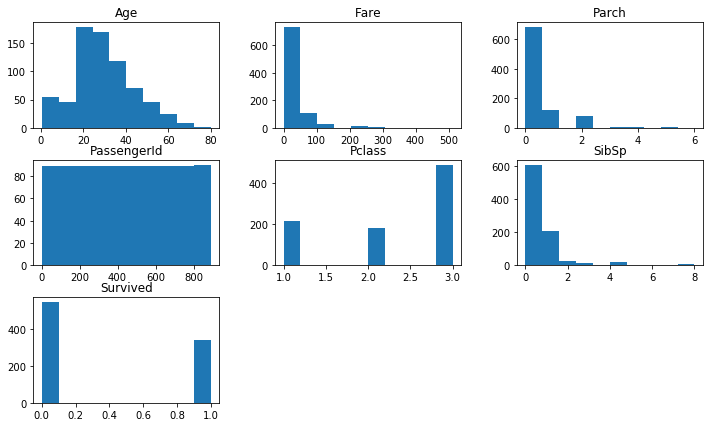

In [38]:
titanic.hist(bins = 10, figsize = (12,7), grid = False)

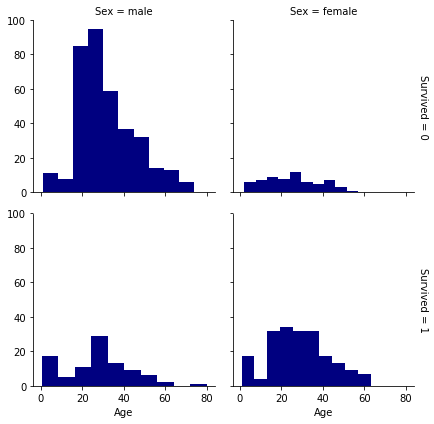

In [39]:
g = sbn.FacetGrid(titanic, col = "Sex", row = "Survived", margin_titles = True)
g.map(plt.hist, "Age", color = "navy")

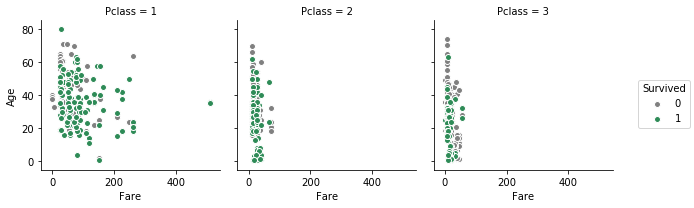

In [40]:
g = sbn.FacetGrid(titanic, hue = "Survived", col = "Pclass", margin_titles = True, palette = {1: "seagreen", 0: "gray"})
g.map(plt.scatter, "Fare", "Age", edgecolor="white").add_legend()

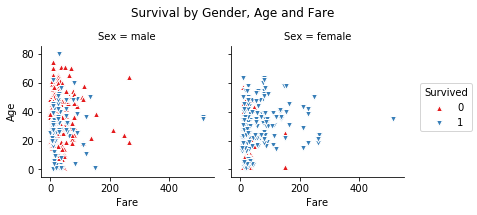

In [41]:
g = sbn.FacetGrid(titanic, col = "Sex", hue = "Survived", margin_titles = True, 
                  palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age", edgecolor="w").add_legend()
plt.subplots_adjust(top = 0.8)
g.fig.suptitle('Survival by Gender, Age and Fare');

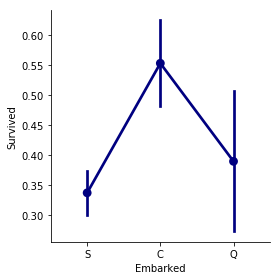

In [42]:
sbn.factorplot(data = titanic, x = "Embarked", y = "Survived", color = "navy")

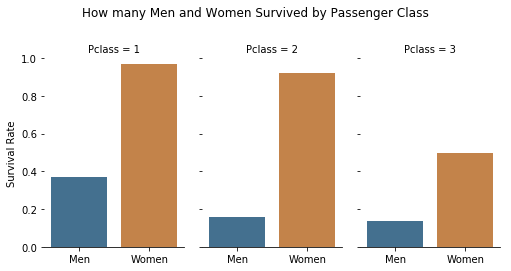

In [43]:
g = sbn.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_var} = {col_name}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

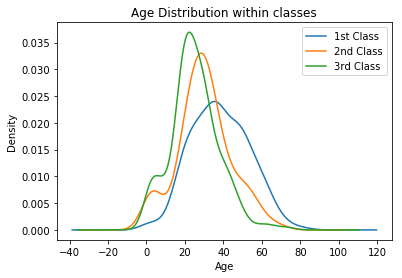

In [44]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;


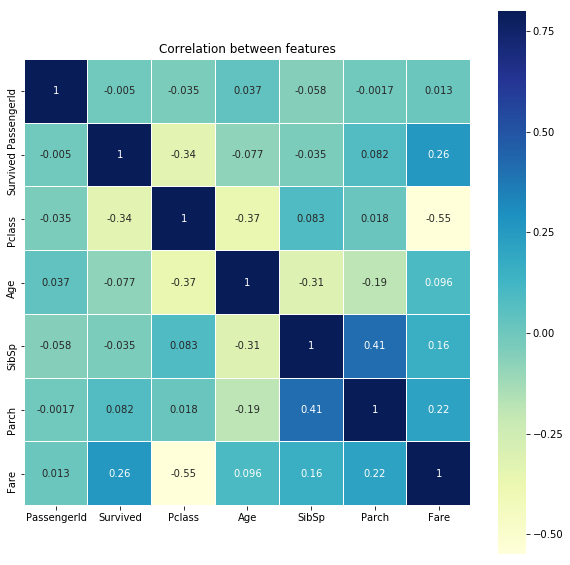

In [49]:
corr=titanic.corr()
plt.figure(figsize=(10, 10))

sbn.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [50]:
titanic.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

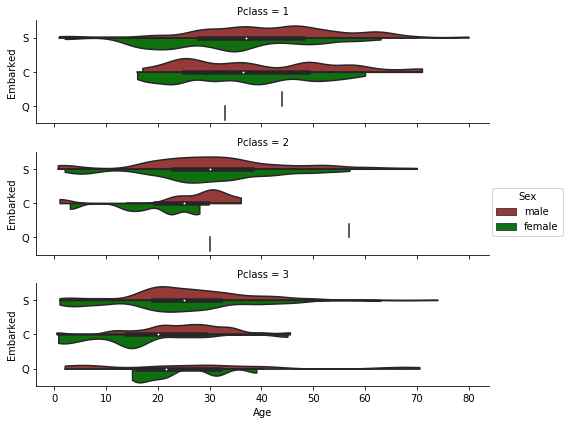

In [53]:
g = sbn.factorplot(x="Age", y="Embarked",
                    hue="Sex", row="Pclass",
                    data=titanic[titanic.Embarked.notnull()],
                    orient="h", size=2, aspect=3.5, 
                   palette={'male':"brown", 'female':"green"},
                    kind="violin", split=True, cut=0, bw=.2);

Missing Value Imputation and Feature Engineering
=========================

**Its important to fill missing values, because some machine learning algorithms can't accept them eg SVM.**

*But filling missing values with mean/median/mode is also a prediction which may not be 100% accurate, instead you can use models like Decision Trees and Random Forest which handle missing values very well.*

*For that we may first need to engineer some new features from the existing ones*

### Embarked

In [59]:
# Lets check which rows have null Embarked column
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


**PassengerId 62 and 830** have missing embarked values

Both have ***Passenger class 1*** and ***fare $80.***

Lets plot a graph to visualize and try to guess from where they embarked

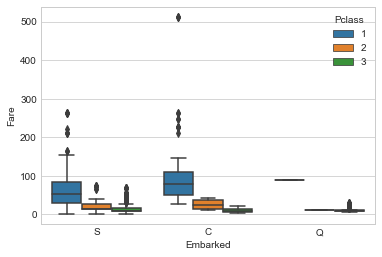

In [61]:
sbn.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic);


We can see that for ***1st class*** median line is coming around ***fare $80*** for ***embarked*** value ***'C'***.
So we can replace NA values in Embarked column with 'C'

In [65]:
titanic["Embarked"] = titanic["Embarked"].fillna('C')
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64


In [74]:
mov_year = 2016
URL = "http://www.imdb.com/search/title?at=0&sort=boxoffice_gross_us,desc&start=1&year={},{}".format(mov_year, mov_year + 1)
print(URL)

http://www.imdb.com/search/title?at=0&sort=boxoffice_gross_us,desc&start=1&year=2016,2017


### Age

Age seems to be a promising feature. So it doesn't make sense to simply fill null values out with median/mean/mode. Instead, we will use Random Forest algorithm to predict ages.

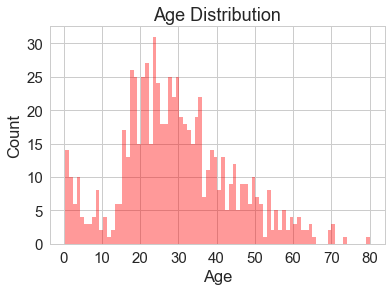

In [55]:
with sbn.plotting_context("notebook",font_scale=1.5):
    sbn.set_style("whitegrid")
    sbn.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="red")
    plt.title("Age Distribution")
    plt.ylabel("Count");

In [69]:
from sklearn.ensemble import RandomForestRegressor

# Predicting missing values in age using Random Forest
def fill_missing_age(df):
    
    #Feature set
    # age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp', 'Title','Pclass','FamilySize', 'FsizeD','NlengthD','Deck']]
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp', 'Title','Pclass']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [ ]:
titanic=fill_missing_age(titanic)

with sbn.plotting_context("notebook",font_scale=1.5):
    sbn.set_style("whitegrid")
    sbn.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sbn.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100));


#### Title

In [ ]:
import re

#A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

#Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))


#Add in the title column.
titanic["Title"] = titles

In [58]:
# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
titanic.loc[titanic["Title"] == "Mlle", "Title"] = 'Miss'
titanic.loc[titanic["Title"] == "Ms", "Title"] = 'Miss'
titanic.loc[titanic["Title"] == "Mme", "Title"] = 'Mrs'
titanic.loc[titanic["Title"] == "Dona", "Title"] = 'Rare'
titanic.loc[titanic["Title"] == "Lady", "Title"] = 'Rare'
titanic.loc[titanic["Title"] == "Countess", "Title"] = 'Rare'
titanic.loc[titanic["Title"] == "Capt", "Title"] = 'Rare'
titanic.loc[titanic["Title"] == "Col", "Title"] = 'Rare'
titanic.loc[titanic["Title"] == "Don", "Title"] = 'Rare'
titanic.loc[titanic["Title"] == "Major", "Title"] = 'Rare'
titanic.loc[titanic["Title"] == "Rev", "Title"] = 'Rare'
titanic.loc[titanic["Title"] == "Sir", "Title"] = 'Rare'
titanic.loc[titanic["Title"] == "Jonkheer", "Title"] = 'Rare'
titanic.loc[titanic["Title"] == "Dr", "Title"] = 'Rare'

titanic["Title"].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64